<a href="https://colab.research.google.com/github/Mamatha-Venukanti/Posenet-Estimation/blob/main/posenetfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras import regularizers
from tensorflow.keras import layers
import cv2

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import os
import numpy as np
import cv2
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:
train_path = '/content/drive/MyDrive/archive/DATASET/TRAIN'
test_path = '/content/drive/MyDrive/archive/DATASET/TEST'


In [ ]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                               validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                               validation_split = 0.2)

In [ ]:
train_generator =  train_datagen.flow_from_directory(directory = train_path,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_path,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)  # Use learning_rate instead of lr
model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])
epochs = 10
batch_size = 16



In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)

Epoch 1/10
 3/55 [>.............................] - ETA: 8:20 - loss: 46.4576 - accuracy: 0.2500

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


55/55 [==============================] - 575s 10s/step - loss: 4.3193 - accuracy: 0.2436 - val_loss: 1.6023 - val_accuracy: 0.2500
Epoch 2/10
55/55 [==============================] - 555s 10s/step - loss: 1.5985 - accuracy: 0.2413 - val_loss: 1.5778 - val_accuracy: 0.2935
Epoch 3/10
55/55 [==============================] - 535s 10s/step - loss: 1.5759 - accuracy: 0.2656 - val_loss: 1.3752 - val_accuracy: 0.4022
Epoch 4/10
55/55 [==============================] - 551s 10s/step - loss: 1.4793 - accuracy: 0.3984 - val_loss: 1.2853 - val_accuracy: 0.5435
Epoch 5/10
55/55 [==============================] - 546s 10s/step - loss: 1.3790 - accuracy: 0.4157 - val_loss: 1.0675 - val_accuracy: 0.5652
Epoch 6/10
55/55 [==============================] - 545s 10s/step - loss: 1.3256 - accuracy: 0.4723 - val_loss: 0.8474 - val_accuracy: 0.6630
Epoch 7/10
55/55 [==============================] - 559s 10s/step - loss: 1.2159 - accuracy: 0.5300 - val_loss: 0.7405 - val_accuracy: 0.7500
Epoch 8/10
55/55 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 128)       0

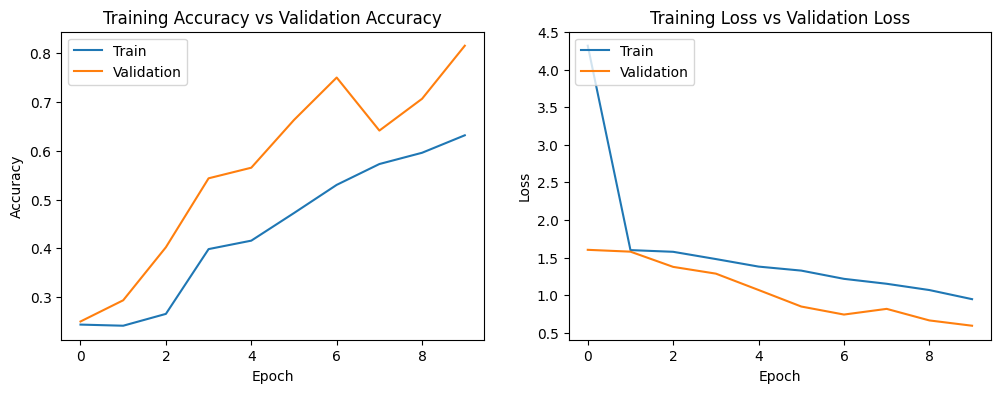

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
import cv2
import numpy as np

# Read and resize the input image
img = cv2.imread('/content/drive/MyDrive/archive/DATASET/TEST/tree/00000001.jpg')
img = cv2.resize(img, (224, 224))

# Reshape the image to match the expected input shape of the model
img = np.reshape(img, [1, 224, 224, 3])

# Make predictions
prediction = model.predict(img)

# Assuming your classes are ['tree', 'downdog', 'goddess', 'plank', 'warrior2']
class_labels = ['tree', 'downdog', 'goddess', 'plank', 'warrior2']

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(prediction)

# Get the class label corresponding to the predicted index
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label and confidence
print(f"Predicted class: {predicted_class_label}")


1/1 [==============================] - 0s 168ms/step
Predicted class: tree


In [ ]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


3/3 [==============================] - 13s 4s/step - loss: 0.5919 - accuracy: 0.8152
final train accuracy = 70.21 , validation accuracy = 81.52


In [ ]:
predictions = model.predict(validation_generator, steps=validation_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

3/3 [==============================] - 13s 4s/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
true_classes = validation_generator.classes

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Convert the indices to class labels
true_labels = [class_labels[idx] for idx in true_classes]
pred_labels = [class_labels[idx] for idx in predicted_classes]

# Generate the classification report
report = classification_report(true_labels, pred_labels, output_dict=True)

# Print the classification report
print("Classification Report:")
for label, metrics in report.items():
    if label in class_labels:  # Check if the label is a class
        print(f"Class {label}:")
        print(f"Precision: {metrics['precision']:.2f}")
        print(f"Recall: {metrics['recall']:.2f}")
        print(f"F1-score: {metrics['f1-score']:.2f}")
        print(f"Support: {metrics['support']}")
        print()


Classification Report:
Class downdog:
Precision: 0.22
Recall: 0.21
F1-score: 0.22
Support: 19

Class goddess:
Precision: 0.14
Recall: 0.06
F1-score: 0.09
Support: 16

Class plank:
Precision: 0.16
Recall: 0.17
F1-score: 0.17
Support: 23

Class tree:
Precision: 0.17
Recall: 0.15
F1-score: 0.16
Support: 13

Class warrior2:
Precision: 0.27
Recall: 0.38
F1-score: 0.31
Support: 21



In [ ]:
!pip install mediapipe



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 34.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


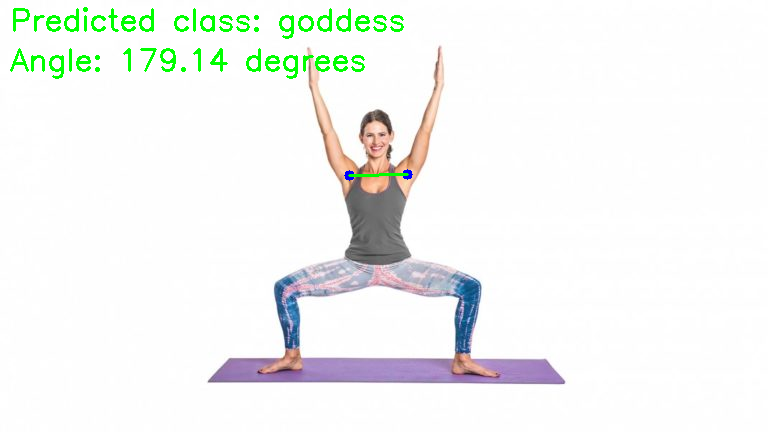

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import mediapipe as mp
import numpy as np
import os

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Function to detect pose landmarks and calculate angle
def detect_pose_and_angle(image):
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect pose landmarks
    results = pose.process(image_rgb)
    if results.pose_landmarks is None:
        return None, None, None, None

    # Calculate angle (example: angle between shoulders)
    # Example: calculate angle between left shoulder, right shoulder, and horizontal axis
    left_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER]
    right_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER]
    angle = np.arctan2(right_shoulder.y - left_shoulder.y, right_shoulder.x - left_shoulder.x)

    return results, angle, left_shoulder, right_shoulder

# Function to display input image with predicted class label and angle
def display_with_prediction_and_angle(image, predicted_class, angle, left_shoulder, right_shoulder):
    # Display predicted class label
    cv2.putText(image, f'Predicted class: {predicted_class}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display angle
    cv2.putText(image, f'Angle: {np.degrees(angle):.2f} degrees', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Draw lines for the detected pose
    cv2.circle(image, (int(left_shoulder.x * image.shape[1]), int(left_shoulder.y * image.shape[0])), 5, (255, 0, 0), -1)
    cv2.circle(image, (int(right_shoulder.x * image.shape[1]), int(right_shoulder.y * image.shape[0])), 5, (255, 0, 0), -1)
    cv2.line(image, (int(left_shoulder.x * image.shape[1]), int(left_shoulder.y * image.shape[0])), (int(right_shoulder.x * image.shape[1]), int(right_shoulder.y * image.shape[0])), (0, 255, 0), 2)

    # Display the image
    cv2_imshow(image)


# Load input image
image_path = '/content/drive/MyDrive/archive/DATASET/TEST/goddess/00000018.jpg'
predicted_class = os.path.basename(os.path.dirname(image_path))

input_image = cv2.imread(image_path)

# Detect pose and angle
pose_results, angle, left_shoulder, right_shoulder = detect_pose_and_angle(input_image)

# Display input image with predicted class label and angle
display_with_prediction_and_angle(input_image, predicted_class, angle, left_shoulder, right_shoulder)


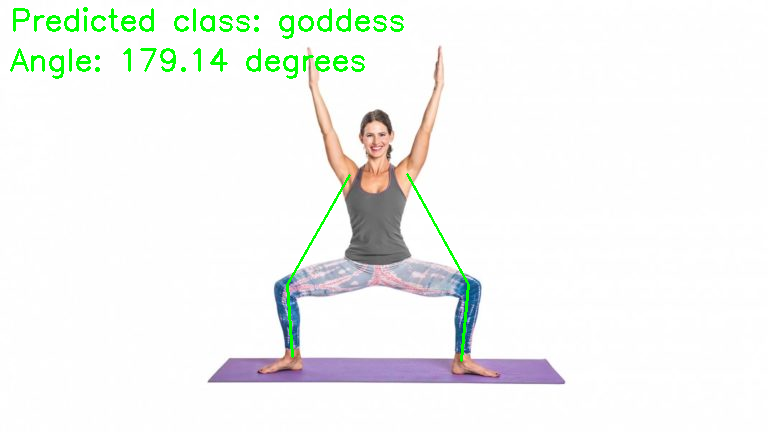

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os
import numpy as np
import mediapipe as mp

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Function to detect pose landmarks and calculate angle
def detect_pose_and_angle(image):
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect pose landmarks
    results = pose.process(image_rgb)
    if results.pose_landmarks is None:
        return None, None, None, None, None, None, None, None

    # Extract pose landmarks
    left_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER]
    right_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER]
    left_knee = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE]
    right_knee = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE]
    left_ankle = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE]
    right_ankle = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE]

    # Calculate angle (example: angle between shoulders)
    angle = np.arctan2(right_shoulder.y - left_shoulder.y, right_shoulder.x - left_shoulder.x)

    return results, angle, left_shoulder, right_shoulder, left_knee, right_knee, left_ankle, right_ankle

# Function to display input image with predicted class label and angle
def display_with_prediction_and_angle(image, image_path, angle, left_shoulder, right_shoulder, left_knee, right_knee, left_ankle, right_ankle):
    # Extract predicted class from the image path
    predicted_class = os.path.basename(os.path.dirname(image_path))

    # Display predicted class label
    cv2.putText(image, f'Predicted class: {predicted_class}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display angle
    cv2.putText(image, f'Angle: {np.degrees(angle):.2f} degrees', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Draw lines for the leg joints
    # Hip to knee
    cv2.line(image, (int(left_shoulder.x * image.shape[1]), int(left_shoulder.y * image.shape[0])),
             (int(left_knee.x * image.shape[1]), int(left_knee.y * image.shape[0])), (0, 255, 0), 2)
    cv2.line(image, (int(right_shoulder.x * image.shape[1]), int(right_shoulder.y * image.shape[0])),
             (int(right_knee.x * image.shape[1]), int(right_knee.y * image.shape[0])), (0, 255, 0), 2)

    # Knee to ankle
    cv2.line(image, (int(left_knee.x * image.shape[1]), int(left_knee.y * image.shape[0])),
             (int(left_ankle.x * image.shape[1]), int(left_ankle.y * image.shape[0])), (0, 255, 0), 2)
    cv2.line(image, (int(right_knee.x * image.shape[1]), int(right_knee.y * image.shape[0])),
             (int(right_ankle.x * image.shape[1]), int(right_ankle.y * image.shape[0])), (0, 255, 0), 2)

    # Display the image
    cv2_imshow(image)

# Example usage
# Load input image
image_path = '/content/drive/MyDrive/archive/DATASET/TEST/goddess/00000018.jpg'
input_image = cv2.imread(image_path)

# Detect pose and angle
pose_results, angle, left_shoulder, right_shoulder, left_knee, right_knee, left_ankle, right_ankle = detect_pose_and_angle(input_image)

# Display input image with predicted class label and angle
display_with_prediction_and_angle(input_image, image_path, angle, left_shoulder, right_shoulder, left_knee, right_knee, left_ankle, right_ankle)


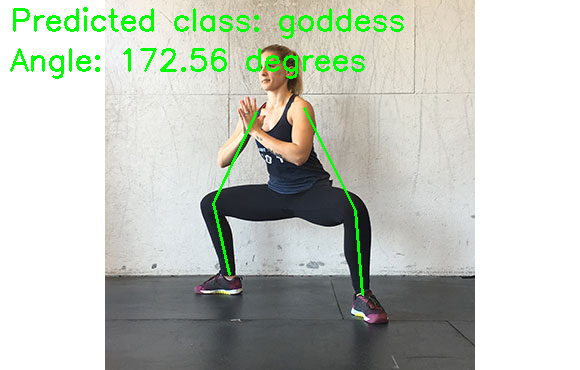

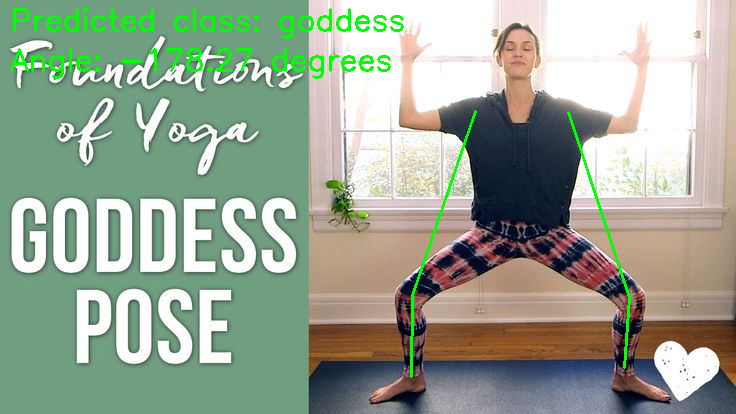

Angle deviation for 00000078.jpg: 6.12 degrees, Predicted Class: goddess


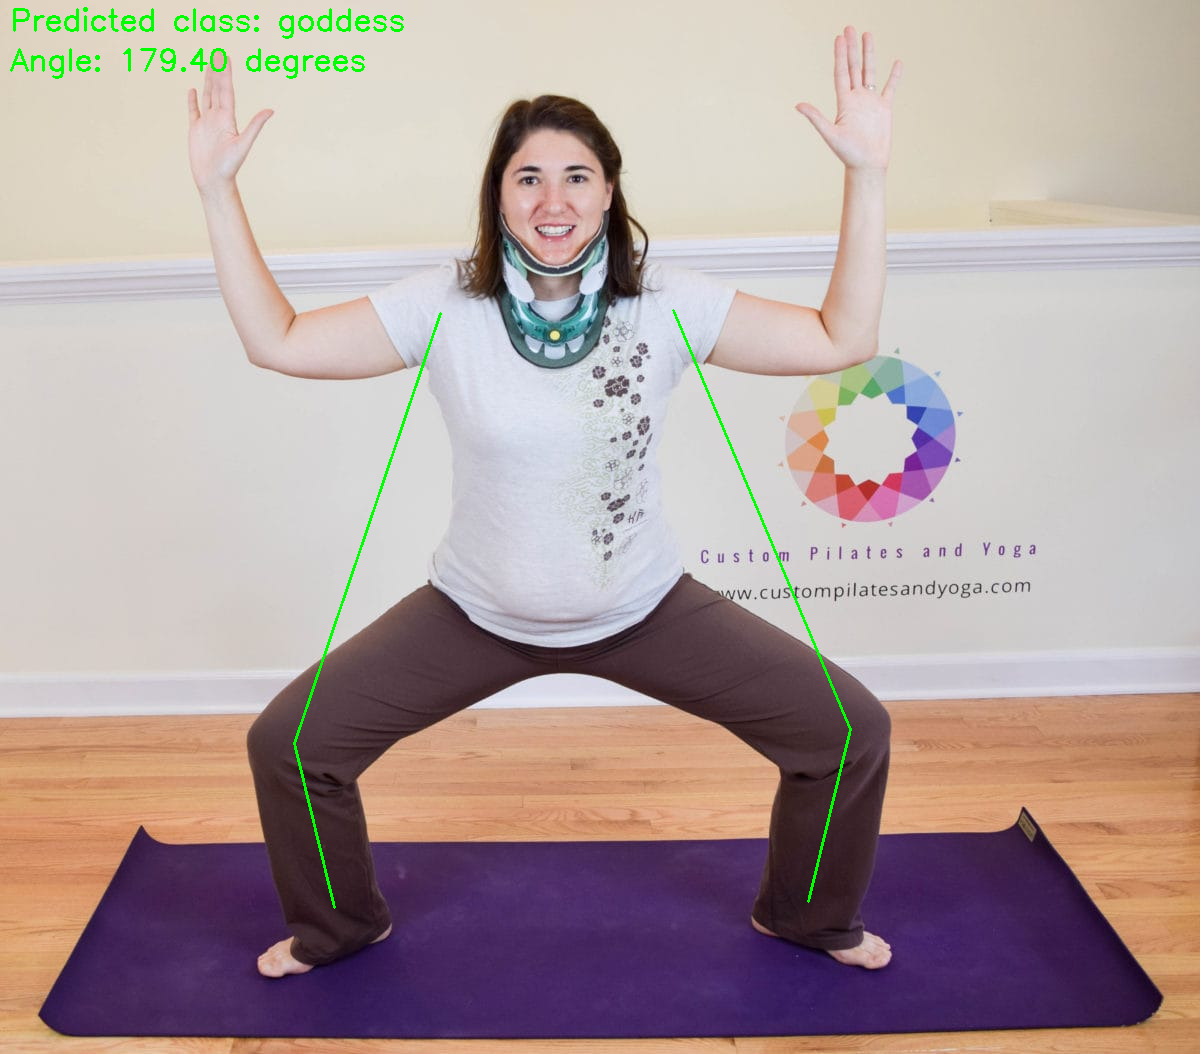

Angle deviation for 00000050.jpg: 0.12 degrees, Predicted Class: goddess


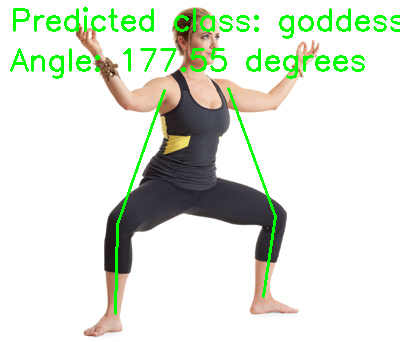

Angle deviation for 00000077.jpg: 0.09 degrees, Predicted Class: goddess


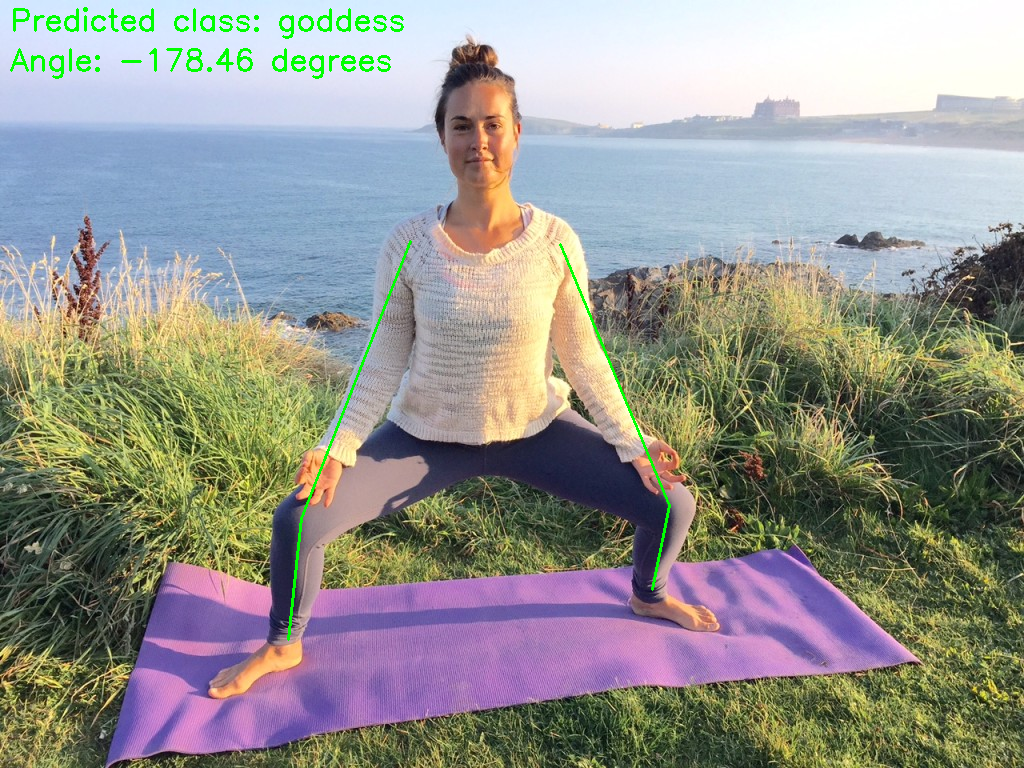

Angle deviation for 00000055.jpg: 6.13 degrees, Predicted Class: goddess


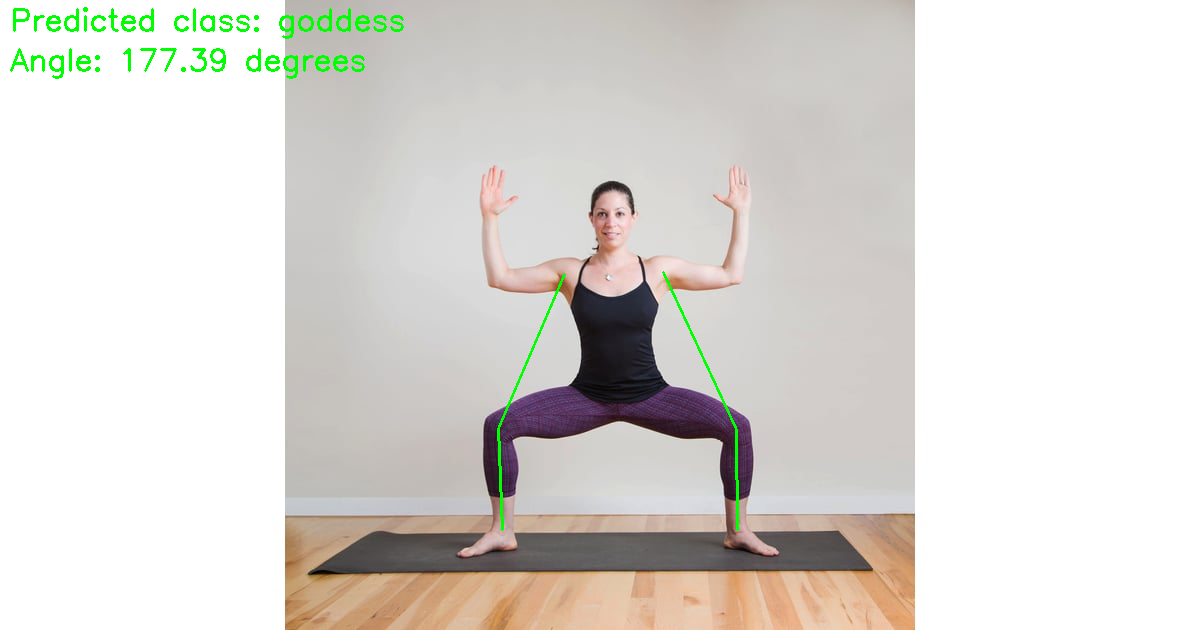

Angle deviation for 00000086.jpg: 0.08 degrees, Predicted Class: goddess


In [ ]:
from google.colab.patches import cv2_imshow

# Function to display input image with predicted class label and angle
def display_with_prediction_and_angle(image, predicted_class, angle, left_shoulder, right_shoulder, left_knee, right_knee, left_ankle, right_ankle):
    # Display predicted class label
    cv2.putText(image, f'Predicted class: {predicted_class}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display angle
    cv2.putText(image, f'Angle: {np.degrees(angle):.2f} degrees', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Draw lines for the leg joints
    cv2.line(image, (int(left_shoulder.x * image.shape[1]), int(left_shoulder.y * image.shape[0])),
             (int(left_knee.x * image.shape[1]), int(left_knee.y * image.shape[0])), (0, 255, 0), 2)
    cv2.line(image, (int(right_shoulder.x * image.shape[1]), int(right_shoulder.y * image.shape[0])),
             (int(right_knee.x * image.shape[1]), int(right_knee.y * image.shape[0])), (0, 255, 0), 2)

    # Knee to ankle
    cv2.line(image, (int(left_knee.x * image.shape[1]), int(left_knee.y * image.shape[0])),
             (int(left_ankle.x * image.shape[1]), int(left_ankle.y * image.shape[0])), (0, 255, 0), 2)
    cv2.line(image, (int(right_knee.x * image.shape[1]), int(right_knee.y * image.shape[0])),
             (int(right_ankle.x * image.shape[1]), int(right_ankle.y * image.shape[0])), (0, 255, 0), 2)

    # Display the image
    cv2_imshow(image)

# Load actual image
actual_image_path = '/content/drive/MyDrive/archive/DATASET/TRAIN/goddess/00000097.jpg'
actual_image = cv2.imread(actual_image_path)

# Detect pose and angle for actual image
actual_results, actual_angle, actual_left_shoulder, actual_right_shoulder, actual_left_knee, actual_right_knee, actual_left_ankle, actual_right_ankle = detect_pose_and_angle(actual_image)

# Extract predicted class from the actual image path
predicted_class = os.path.basename(os.path.dirname(actual_image_path))

# Display actual image with predicted class label and angle
display_with_prediction_and_angle(actual_image, predicted_class, actual_angle, actual_left_shoulder, actual_right_shoulder, actual_left_knee, actual_right_knee, actual_left_ankle, actual_right_ankle)

# Load input images of the same class
input_images_dir = '/content/drive/MyDrive/archive/DATASET/TEST/goddess'
input_images = os.listdir(input_images_dir)

# Select up to 5 random input images
import random
input_images = random.sample(input_images, min(5, len(input_images)))

# Iterate through input images
for input_image_name in input_images:
    input_image_path = os.path.join(input_images_dir, input_image_name)
    input_image = cv2.imread(input_image_path)

    # Detect pose and angle for input image
    input_results, input_angle, input_left_shoulder, input_right_shoulder, input_left_knee, input_right_knee, input_left_ankle, input_right_ankle = detect_pose_and_angle(input_image)

    # Extract predicted class from the input image path
    predicted_class = os.path.basename(os.path.dirname(input_image_path))

    # Display input image with angle and predicted class
    display_with_prediction_and_angle(input_image, predicted_class, input_angle, input_left_shoulder, input_right_shoulder, input_left_knee, input_right_knee, input_left_ankle, input_right_ankle)

    # Calculate angle deviation
    angle_deviation = abs(actual_angle - input_angle)
    print(f"Angle deviation for {input_image_name}: {angle_deviation:.2f} degrees, Predicted Class: {predicted_class}")
